In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Act Math encoded, label proficient score

In [42]:
actMath_11_encoded_df = pd.read_csv('../dataframes/actMath_11_encoded_df.csv')

In [43]:
print(actMath_11_encoded_df.info())  # Check dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   studentId                    2580 non-null   int64  
 1   is_proficient                2580 non-null   bool   
 2   proficient_score             2580 non-null   float64
 3   school_High School A         2580 non-null   bool   
 4   school_High School B         2580 non-null   bool   
 5   school_High School C         2580 non-null   bool   
 6   school_High School D         2580 non-null   bool   
 7   iready_math                  2580 non-null   int64  
 8   iready_reading               2580 non-null   int64  
 9   bbb_literacy                 2580 non-null   int64  
 10  category_MATHEMATICS         2580 non-null   int64  
 11  category_ENGLISH             2580 non-null   int64  
 12  category_SCIENCE             2580 non-null   int64  
 13  category_SOCIAL_ST

In [44]:
actMath_11_encoded_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,...,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.264706,True,False,False,False,0,0,0,...,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.264706,True,False,False,False,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.941176,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [45]:
actMath_11_encoded_df.columns

Index(['studentId', 'is_proficient', 'proficient_score',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [46]:
actMath_11_encoded_df.dtypes

studentId                        int64
is_proficient                     bool
proficient_score               float64
school_High School A              bool
school_High School B              bool
school_High School C              bool
school_High School D              bool
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS          bool
category_VISUAL_ARTS              bool
category_TECHNOLOGY               bool
category_BUSINESS                 bool
category_TRADES                   bool
category_AGRICULTURE              bool
category_PHYSICAL_EDUCATION       bool
category_HEALTH                   bool
category_CAREER_PREP              bool
category_MILITARY_SCIENCE         bool
dtype: object

In [47]:
#changing every bool into intsa
actMath_11_encoded_df[actMath_11_encoded_df.select_dtypes(include=['bool']).columns] = actMath_11_encoded_df.select_dtypes(include=['bool']).astype(int)
print(actMath_11_encoded_df.dtypes)

studentId                        int64
is_proficient                    int64
proficient_score               float64
school_High School A             int64
school_High School B             int64
school_High School C             int64
school_High School D             int64
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS         int64
category_VISUAL_ARTS             int64
category_TECHNOLOGY              int64
category_BUSINESS                int64
category_TRADES                  int64
category_AGRICULTURE             int64
category_PHYSICAL_EDUCATION      int64
category_HEALTH                  int64
category_CAREER_PREP             int64
category_MILITARY_SCIENCE        int64
dtype: object


In [48]:
y = actMath_11_encoded_df['proficient_score']
X= actMath_11_encoded_df.drop(['proficient_score', 'studentId', 'is_proficient'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,stratify = actMath_11_encoded_df['is_proficient'],random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 2580
(2064, 22)
(516, 22)


In [49]:
X.columns

Index(['school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [ ]:
#possible hyperparameters

max_depth_values= [8,12,25,32]
min_samples_leaf_values = [4,5,8,10]
param_grid = {'max_depth' : list(max_depth_values), 'min_samples_leaf' : list(min_samples_leaf_values)}


#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressorRead = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid = GridSearchCV(dt_regressorRead, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print("Done")
dt_best_paramsRead = dt_grid_search.best_params_

dt_best_paramsRead

#{'max_depth': 8, 'min_samples_leaf': 8}

Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 8}

In [51]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=8)
dt_model.fit(X_train,y_train)

#testing model on the X_test
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test,y_dt_pred,squared=False)
dt_r2 = r2_score(y_test,y_dt_pred)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_bool = y_dt_pred >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.94      0.84       329
        True       0.82      0.49      0.62       187

    accuracy                           0.78       516
   macro avg       0.79      0.72      0.73       516
weighted avg       0.79      0.78      0.76       516

[DT] Root Mean Squared Error: 0.20445536483973795
[DT] R2: 0.26880868295384774


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)


Micro F1 Score: 0.7771317829457365


Confusion Matrix:
[[309  20]
 [ 95  92]]


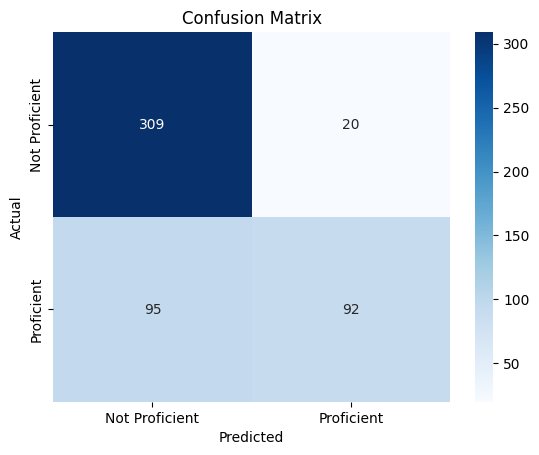

In [53]:
cm = confusion_matrix(y_test_bool, y_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [54]:
importances = dt_model.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                        Feature  Importance
10      category_SOCIAL_STUDIES    0.521350
9              category_SCIENCE    0.168843
7          category_MATHEMATICS    0.092980
17         category_AGRICULTURE    0.025178
13         category_VISUAL_ARTS    0.025120
16              category_TRADES    0.022553
11    category_FOREIGN_LANGUAGE    0.021540
12     category_PERFORMING_ARTS    0.020186
2          school_High School C    0.019901
19              category_HEALTH    0.018953
18  category_PHYSICAL_EDUCATION    0.016261
3          school_High School D    0.012001
0          school_High School A    0.011580
20         category_CAREER_PREP    0.009601
4                   iready_math    0.005125
8              category_ENGLISH    0.004655
14          category_TECHNOLOGY    0.002100
21    category_MILITARY_SCIENCE    0.001336
5                iready_reading    0.000737
1          school_High School B    0.000000
6                  bbb_literacy    0.000000
15            category_BUSINESS 

SHAP

In [55]:
import shap

In [56]:
explainer = shap.Explainer(dt_model)
shap_test = explainer(X_test)
shap_df = pd.DataFrame(shap_test.values, columns=shap_test.feature_names,
  index=X_test.index)
# Fetch the importances
shap_df = shap_df.apply(np.abs).mean().sort_values(ascending=False)
print(shap_df)

category_SOCIAL_STUDIES        0.055111
category_SCIENCE               0.032715
category_MATHEMATICS           0.023772
category_FOREIGN_LANGUAGE      0.006388
category_PERFORMING_ARTS       0.006140
category_AGRICULTURE           0.005974
category_VISUAL_ARTS           0.004529
category_HEALTH                0.003750
category_ENGLISH               0.003194
school_High School D           0.002843
school_High School C           0.002590
category_PHYSICAL_EDUCATION    0.002589
category_TRADES                0.002484
school_High School A           0.002325
iready_math                    0.001935
category_CAREER_PREP           0.001682
category_TECHNOLOGY            0.000753
iready_reading                 0.000710
category_MILITARY_SCIENCE      0.000376
school_High School B           0.000000
bbb_literacy                   0.000000
category_BUSINESS              0.000000
dtype: float64


<Axes: title={'center': 'Top 10 Important Features'}>

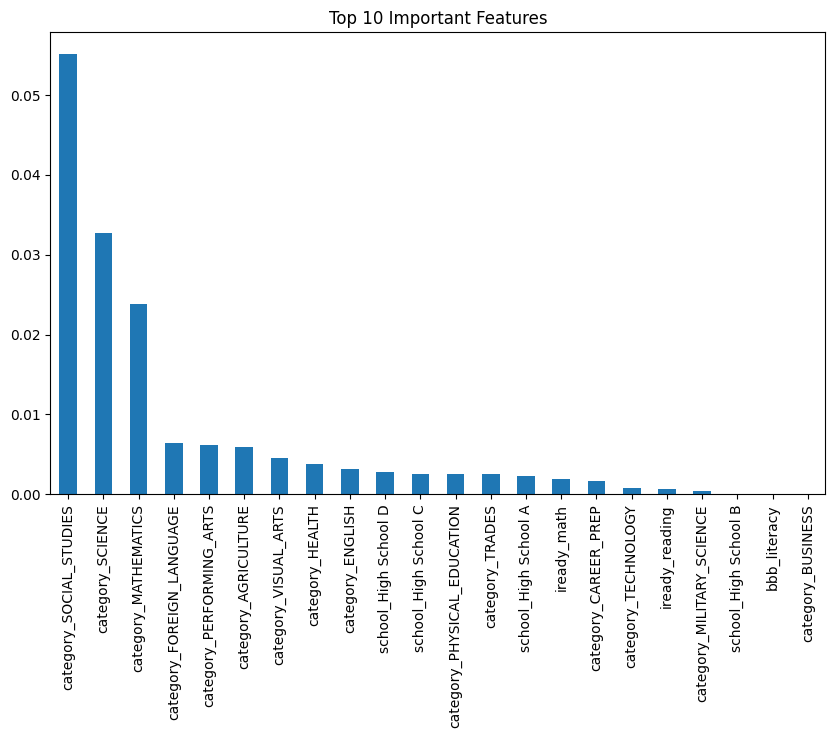

In [57]:
shap_df.head(25).plot(kind='bar', title='Top 10 Important Features', figsize=(10, 6))
